In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import time
import seaborn as sns
import pandas as pd
#New
from scipy.spatial import distance
import scipy.interpolate as interpolate
from scipy.integrate import quad
#Display
from tqdm.notebook import tqdm
from IPython.display import display, clear_output
#Custom
import embeddings as emb
import utils
import losses
import knn

In [23]:
dict_scen = {}
dict_scen['base'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['clump2'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':2,'linearsep':2}
dict_scen['clump3'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':2,'linearsep':4}
dict_scen['clump4'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':2,'linearsep':8}
dict_scen['clump5'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':3,'linearsep':2}
dict_scen['clump6'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':3,'linearsep':4}
dict_scen['clump7'] = {'n_concepts':200,'noise' : 0.001,'embdim':2,'n_epicentres':3,'linearsep':8}
dict_scen['embdim3'] = {'n_concepts':200,'noise' : 0.001,'embdim':3,'n_epicentres':1,'linearsep':1}
dict_scen['embdim4'] = {'n_concepts':200,'noise' : 0.001,'embdim':4,'n_epicentres':1,'linearsep':1}
dict_scen['embdim5'] = {'n_concepts':200,'noise' : 0.001,'embdim':5,'n_epicentres':1,'linearsep':1}
dict_scen['embdim7'] = {'n_concepts':200,'noise' : 0.001,'embdim':7,'n_epicentres':1,'linearsep':1}
dict_scen['embdim10'] = {'n_concepts':200,'noise' : 0.001,'embdim':10,'n_epicentres':1,'linearsep':1}
dict_scen['noise5e-3'] = {'n_concepts':200,'noise' : 0.005,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['noise1e-2'] = {'n_concepts':200,'noise' : 0.01,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['noise2e-2'] = {'n_concepts':200,'noise' : 0.02,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['ncon50'] = {'n_concepts':50,'noise' : 0.001,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['ncon100'] = {'n_concepts':100,'noise' : 0.001,'embdim':2,'n_epicentres':1,'linearsep':1}
dict_scen['ncon300'] = {'n_concepts':300,'noise' : 0.001,'embdim':2,'n_epicentres':1,'linearsep':1}

In [24]:
def get_avg_n(rad,n_systems,n_concepts,embdim,noise,n_epicentres,linearsep,bplot = False):
    n_iter = 10
    runs = ['run%d'%d for d in range(n_iter)]
    sds = [4941, 5927, 8947,  482, 8268, 3529, 3469, 6632, 6899, 1623]
    freqs = []
    for i in range(n_iter):
        sd = sds[i] #np.random.randint(0,100000)
        A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,embdim,noise,n_epicentres,linearsep,sd,bplot=False)
        radk_dist, radk_idx, freq, maxk = knn.get_radiusk(A,rad)
        freq = np.array(freq[:,1])
        freqs.append(freq)
        avg = np.mean(np.array(freqs))
    if bplot:
        print(avg)
        df = utils.sns_cat_data_to_df(runs,freqs,cat_name='scen',val_name = 'Nneighnours')
        fig, ax = plt.subplots(1,1,figsize = (15,5))
        sns.violinplot(x='scen', y='Nneighnours', kind="box", data=df, bw = 0.005, scale='count',ax = ax)
        plt.show()
    return avg,freqs,runs

In [28]:
n_systems = 2
# rad = 0.3
scen_names = list(dict_scen)
scen_names = ['base','clump2-2','clump2-4','clump2-8','clump3-2','clump3-4','clump3-8','embdim3','embdim4','embdim5','embdim7','embdim10',
              'noise5e-3','noise1e-2','noise2e-2','ncon50','ncon100','ncon300']
all_freqs = []
Ns = []
rads = []
best_avgs = []
avg_matches_accs = []
df_all_res,df_summary_res, df_params = get_dfs_from_key('all')
for scen,d in dict_scen.items():
    n_concepts = d['n_concepts']
    noise = d['noise']
    embdim = d['embdim']
    n_epicentres = d['n_epicentres']
    linearsep = d['linearsep']
    rad, best_avg , rad_test,all_accs_per_rad,avg_accs_per_rad = get_rad_data(scen,df_params)
    avg_matches_acc,scen_matches_acc = get_matches_data(scen,df_summary_res)
    avg,freqs,runs = get_avg_n(rad,n_systems,n_concepts,embdim,noise,n_epicentres,linearsep,bplot = False)
    all_freqs.append(np.array(freqs))
    Ns.append(avg)
    rads.append(rad)
    avg_matches_accs.append(avg_matches_acc)
    best_avgs.append(best_avg)
print(scen_names)
print(Ns)
print(rads)

['base', 'clump2', 'clump3', 'clump4', 'clump5', 'clump6', 'clump7', 'embdim3', 'embdim4', 'embdim5', 'embdim7', 'embdim10', 'noise5e-3', 'noise1e-2', 'noise2e-2', 'ncon50', 'ncon100', 'ncon300']
['base', 'clump2-2', 'clump2-4', 'clump2-8', 'clump3-2', 'clump3-4', 'clump3-8', 'embdim3', 'embdim4', 'embdim5', 'embdim7', 'embdim10', 'noise5e-3', 'noise1e-2', 'noise2e-2', 'ncon50', 'ncon100', 'ncon300']
[150.844, 102.84, 49.227, 71.286, 71.087, 52.654, 49.484, 159.084, 140.835, 153.509, 155.274, 98.566, 119.911, 119.911, 150.844, 30.308, 71.166, 236.326]
[0.25, 0.2, 0.08, 0.06, 0.15, 0.09, 0.04, 0.3, 0.3, 0.35, 0.4, 0.4, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25]


Text(0, 0.5, 'Average number \n of neighbours selected')

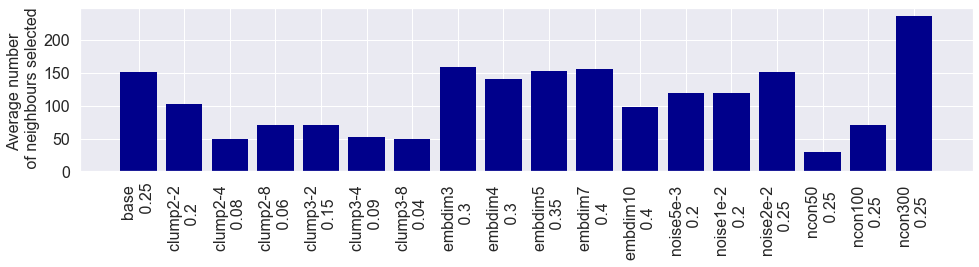

In [29]:
fig = plt.figure(figsize = (16,3)) 
labels = ['%s \n %s'%(scen_names[i],rads[i]) for i in range(len(rads))]
plt.bar(labels,Ns,linewidth=0,color = 'darkblue')
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Average number \n of neighbours selected',fontsize = 16)
# fig = plt.figure(figsize = (16,3)) 
# plt.bar(labels,best_avgs)
# plt.xticks(rotation=90)
# fig = plt.figure(figsize = (16,3)) 
# plt.bar(labels,avg_matches_accs)
# plt.xticks(rotation=90)

In [31]:
print(len(all_freqs))
print(all_freqs[0].shape)

18
(10, 200)


Text(0, 0.5, 'Average number \n of neighbours selected')

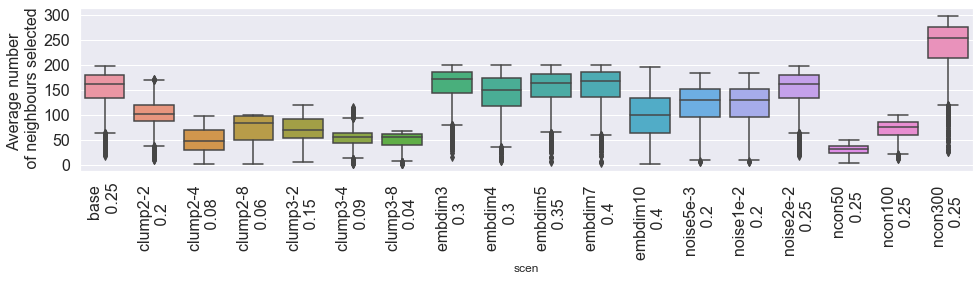

In [32]:
fig = plt.figure(figsize = (16,3)) 
data = [freqs.reshape(-1) for freqs in all_freqs] #Faltten
labels = ['%s \n %s'%(scen_names[i],rads[i]) for i in range(len(rads))]
df= utils.sns_cat_data_to_df(labels,data,cat_name='scen',val_name = 'Nn')
sns.boxplot(x="scen", y="Nn", data=df)
# plt.bar(labels,Ns,linewidth=0,color = 'darkblue')
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Average number \n of neighbours selected',fontsize = 16)

In [35]:
print(all_freqs2[3][6] + 0.001*np.random.randn(200))

[ 99.99994716 100.00112066 100.00067519  99.99969258 100.00135557
  99.99995551  99.99861099 100.00067026  99.99721523 100.00138646
  99.99931198  99.99961481  99.99990133  99.99949479  99.99933346
  99.99829723  99.99831573 100.00041557 100.0001008  100.00010318
 100.00149558  99.99949328  99.99869793 100.00145274 100.00031588
 100.00112261 100.00081197  99.99936724 100.00101902 100.00073223
  99.99870615  99.99784211 100.00000488 100.00175995 100.00118402
  99.99988212 100.00077102 100.0007263  100.00096403  99.99957633
 100.00040451  99.99896036 100.00016621 100.00027858  99.9983648
 100.00025264 100.00030769 100.00052132  99.9994263   99.99954738
 100.0011111   99.99863215 100.00050879  99.99993161 100.00027561
  99.99897534 100.00008033  99.99861393 100.00040347  99.99999821
  99.99993307 100.00027858 100.00051675  99.99985539  99.9995133
  99.99966659 100.00002651 100.00029136 100.00098374  99.99898222
 100.00046287 100.00187104 100.00118423  99.99849219 100.00074976
 100.0003753

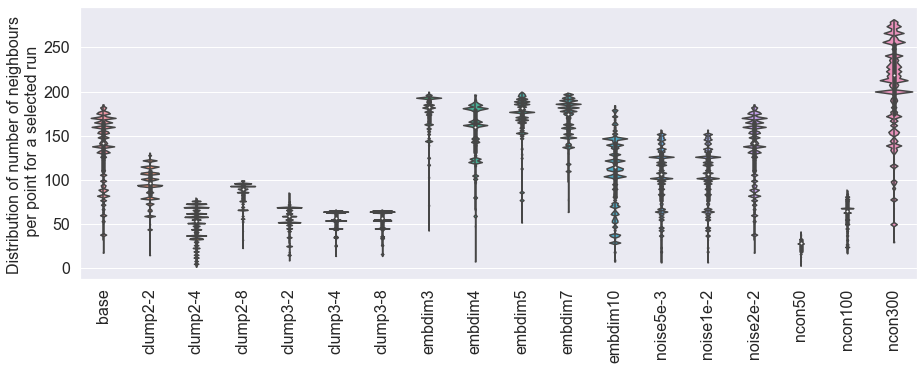

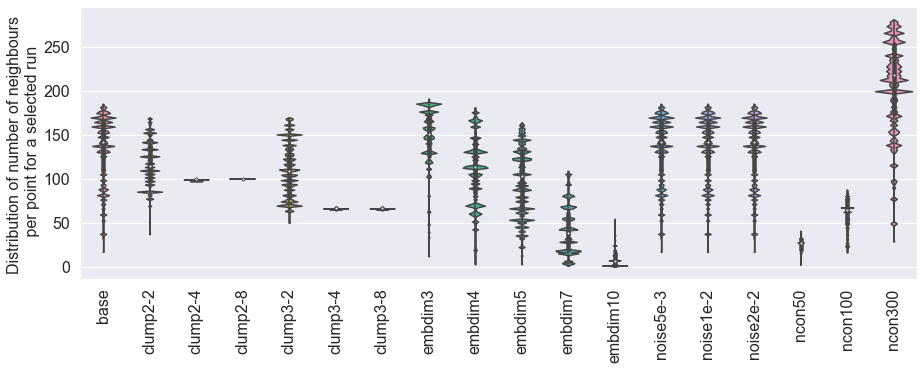

In [38]:
i = 9
data = [freqs[i] for freqs in all_freqs] #First run only
# scen_names = list(dict_scen)
scen_names = ['base','clump2-2','clump2-4','clump2-8','clump3-2','clump3-4','clump3-8','embdim3','embdim4','embdim5','embdim7','embdim10',
              'noise5e-3','noise1e-2','noise2e-2','ncon50','ncon100','ncon300']
df = utils.sns_cat_data_to_df(scen_names,data,cat_name='scen',val_name = 'Nneighnours')
fig, ax = plt.subplots(1,1,figsize = (15,5))
sns.violinplot(x='scen', y='Nneighnours', data=df, bw = 0.005, scale='count',ax = ax)
# sns.boxplot(x='scen', y='Nneighnours', data=df,ax = ax)
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Distribution of number of neighbours \n per point for a selected run',fontsize = 16)
plt.xlabel('')
plt.show()
data = [freqs[i] for freqs in all_freqs2] #First run only
data[2] = data[2] + 0.001*np.random.randn(200)
data[3] = data[3] + 0.001*np.random.randn(200)
scen_names = list(dict_scen)
scen_names = ['base','clump2-2','clump2-4','clump2-8','clump3-2','clump3-4','clump3-8','embdim3','embdim4','embdim5','embdim7','embdim10',
              'noise5e-3','noise1e-2','noise2e-2','ncon50','ncon100','ncon300']
df = utils.sns_cat_data_to_df(scen_names,data,cat_name='scen',val_name = 'Nneighnours')
fig, ax = plt.subplots(1,1,figsize = (15,5))
sns.violinplot(x='scen', y='Nneighnours', data=df, bw = 0.005, scale='count',ax = ax)
# sns.boxplot(x='scen', y='Nneighnours', data=df,ax = ax)
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Distribution of number of neighbours \n per point for a selected run',fontsize = 16)
plt.xlabel('')
plt.show()

In [70]:
# #Example
# n_systems = 2
# rad = 0.25
# n_concepts = 200
# noise = 0.001 #0.001
# embdim = 2
# n_epicentres = 1
# linearsep = 1
# avg,freqs,runs = get_avg_n(rad,n_systems,n_concepts,embdim,noise,n_epicentres,linearsep,bplot = False)
# #Print
# print(avg)
# df = utils.sns_cat_data_to_df(runs,freqs,cat_name='scen',val_name = 'Nneighnours')
# fig, ax = plt.subplots(1,1,figsize = (15,5))
# sns.violinplot(x='scen', y='Nneighnours', kind="box", data=df, bw = 0.005, scale='count',ax = ax)
# plt.show()

# Fixed radius

In [34]:
#===FIXED RADIUS
n_systems = 2
rad = 0.25
scen_names = list(dict_scen)
all_freqs2 = []
Ns2 = []
rads2 = []
best_avgs2 = []
avg_matches_accs2 = []
df_all_res,df_summary_res, df_params = get_dfs_from_key('all')
for scen,d in dict_scen.items():
    n_concepts = d['n_concepts']
    noise = d['noise']
    embdim = d['embdim']
    n_epicentres = d['n_epicentres']
    linearsep = d['linearsep']
    avg_matches_acc,scen_matches_acc = get_matches_data(scen,df_summary_res)
    avg,freqs,runs = get_avg_n(rad,n_systems,n_concepts,embdim,noise,n_epicentres,linearsep,bplot = False)
    all_freqs2.append(np.array(freqs))
    Ns2.append(avg)
    rads2.append(rad)
    avg_matches_accs2.append(avg_matches_acc)
print(scen_names2)
print(Ns2)
print(rads2)

['base', 'clump2', 'clump3', 'clump4', 'clump5', 'clump6', 'clump7', 'embdim3', 'embdim4', 'embdim5', 'embdim7', 'embdim10', 'noise5e-3', 'noise1e-2', 'noise2e-2', 'ncon50', 'ncon100', 'ncon300']


NameError: name 'scen_names2' is not defined

Text(0, 0.5, 'Average number \n of neighbours selected')

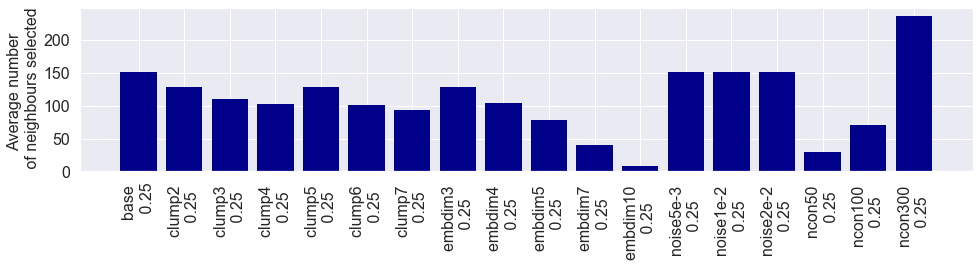

In [88]:
fig = plt.figure(figsize = (16,3)) 
labels = ['%s \n %s'%(scen_names[i],rads2[i]) for i in range(len(rads))]
plt.bar(labels,Ns2,linewidth=0,color = 'darkblue')
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Average number \n of neighbours selected',fontsize = 16)

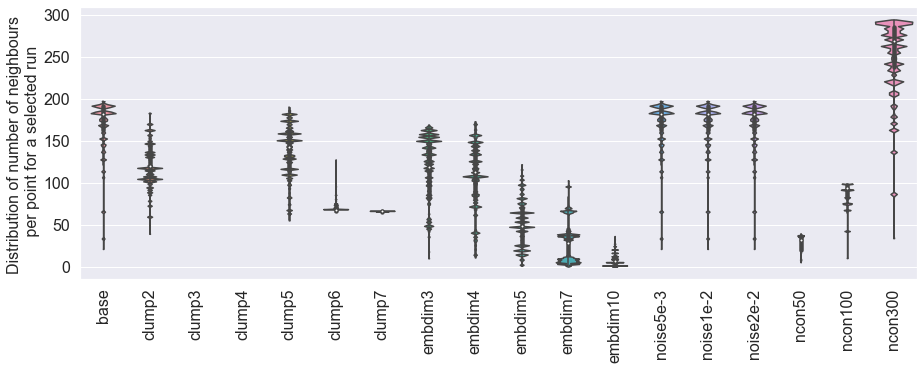

In [101]:
data = [freqs[6] for freqs in all_freqs2] #First run only
scen_names = list(dict_scen)
df = utils.sns_cat_data_to_df(scen_names,data,cat_name='scen',val_name = 'Nneighnours')
fig, ax = plt.subplots(1,1,figsize = (15,5))
sns.violinplot(x='scen', y='Nneighnours', data=df, bw = 0.005, scale='count',ax = ax)
# sns.boxplot(x='scen', y='Nneighnours', data=df,ax = ax)
plt.xticks(rotation=90,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Distribution of number of neighbours \n per point for a selected run',fontsize = 16)
plt.xlabel('')
plt.show()

# GET BEST RADIUS

In [11]:
pref = 'knn_pretrain_angles_radius_best_'
def prefix(dic,pref):
    for key in dic:
        dic[key] = [pref+scen for scen in dic[key]]
    return dic

In [12]:
from utils import flatten_list_of_list as flat
import copy
scen_folder = 'knn_pretrain_angles_radius_best' #Folder in which all experiments are stored. 
dict_file_names = {}
dict_file_names['clump'] = flat([['base'],["clump%d"%i for i in range(2,8)]]) #base as has ceiling accuracy
dict_file_names['embdim'] = ['base',"embdim3","embdim4","embdim5","embdim7","embdim10"]
dict_file_names['noise'] = ['base','noise5e-3','noise1e-2','noise2e-2']
dict_file_names['ncon'] = ['ncon50','base','ncon300']
dict_file_names['all'] = ['base',"clump2","clump3","clump4","clump5","clump6","clump7"
                          ,"embdim3","embdim4","embdim5","embdim7","embdim10",
                         'noise5e-3','noise1e-2','noise2e-2',
                         'ncon50','ncon100','ncon300']
dict_file_names = prefix(dict_file_names,pref)
# print(dict_file_names['all'])
#Exp names if need to change
dict_exp_names = copy.deepcopy(dict_file_names)
#Names to replace with
dict_new_names = copy.deepcopy(dict_exp_names)
dict_new_names['clump'] = flat([['clump1 \n (base)'],["clump%d"%i for i in range(2,8)]])
dict_new_names['embdim'] = ['emdim2 \n (base)',"embdim3","embdim4","embdim5","embdim7","embdim10"]
dict_new_names['noise'] = ['noise1e-3 \n (base)','noise5e-3','noise1e-2','noise2e-2']
dict_new_names['ncon'] = ['ncon50','ncon200 \n (base)','ncon300']
dict_new_names['all'] = ['base',"clump2","clump3","clump4","clump5","clump6","clump7"
                          ,"embdim3","embdim4","embdim5","embdim7","embdim10",
                         'noise5e-3','noise1e-2','noise2e-2',
                         'ncon50','ncon100','ncon300']
print(dict_new_names['all'])

['base', 'clump2', 'clump3', 'clump4', 'clump5', 'clump6', 'clump7', 'embdim3', 'embdim4', 'embdim5', 'embdim7', 'embdim10', 'noise5e-3', 'noise1e-2', 'noise2e-2', 'ncon50', 'ncon100', 'ncon300']


In [13]:
#Paths
import os
from pathlib import Path
fp_repo = "/Users/roseline/Docs/UCL/Projects/B.Roads/B.Roads code/Fork/unsupervised-alignment-team-master"
#fp_repo = '/content/gdrive/My Drive/unsupervised-alignment-team-master'
fp_intersect = fp_repo / Path('python','assets','intersect')
fp_save = fp_repo / Path('save',scen_folder)
os.chdir(fp_repo / Path('python'))

In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import time
from matplotlib import gridspec
import matplotlib
from matplotlib.ticker import MaxNLocator
#Custom
import utils
import models
#KERAS
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
sns.set(font_scale=1)

Using TensorFlow backend.


In [15]:
def get_exps_dfs(fp_save,exp_names,file_names):
    #== Get path of save folder/ models and data
    n_exp = len(file_names)
    fp_runs_list = []
    fp_models_list = []
    for i in range(n_exp):
        save_folder = file_names[i]
        fp_runs_list.append(fp_save / Path(save_folder))
        fp_models_list.append(fp_save / Path(save_folder,'models'))
    #====Get params====
    dict_params_list = []
    for i in range(n_exp):
        fp_runs = fp_runs_list[i]
        with open(fp_runs /Path('dict_params.pickle'), 'rb') as handle:
            dict_params = pickle.load(handle)
            dict_params_list.append(dict_params)
    #display(pd.DataFrame(dict_params_list))
    df_params = pd.DataFrame(dict_params_list)
    ##========GET RESULTS==========
    df_all_res_list = []
    df_summary_res_list = []
    for i in range(n_exp):
        fp_runs = fp_runs_list[i]
        with open(str(fp_runs)+'/all_res.pickle', 'rb') as handle:
            all_res = pickle.load(handle)
        with open(str(fp_runs)+'/summary_res.pickle', 'rb') as handle:
            summary_res = pickle.load(handle)
            df_all_res = pd.DataFrame(utils.flatten_list_of_list(all_res))
            df_summary_res = pd.DataFrame(summary_res)
        df_all_res_list.append(df_all_res)
        df_summary_res_list.append(df_summary_res)
    df_all_res = pd.concat(df_all_res_list)
    df_summary_res = pd.concat(df_summary_res_list)
    #==Add columns for average accuracies to df_all_res
    df_all_res = add_avg_acc_columns(df_all_res)
    return df_all_res,df_summary_res, df_params
def add_avg_acc_columns(df_all_res):
    #==Add columns for average accuracies to df_all_res
    for s in ['1','5','10','half']:
        df_all_res['acc%s'%s] = 1/2 *(df_all_res['acc_f%s'%s]+df_all_res['acc_g%s'%s])
    return df_all_res
def get_dfs_from_key(key):
    file_names,exp_names,new_names = dict_file_names[key],dict_exp_names[key],dict_new_names[key]
    new_names = [n.replace(" \n (base)", "") for n in new_names]
    print(new_names)
    df_all_res,df_summary_res, df_params = get_exps_dfs(fp_save,exp_names,file_names)
    for df in [df_all_res,df_summary_res, df_params]:
            df["experiment_name"] = df["experiment_name"].replace(exp_names,new_names)
    return df_all_res,df_summary_res, df_params

In [16]:
def get_rad_data(scen,df_params):
    df = df_params[df_params['experiment_name']== scen]
    rad_test,all_accs_per_rad = list(df['params_tested'])[0],np.array(list(df['all_accs'])[0])
    rad, best_avg = list(df['rad'])[0], list(df['avg'])[0]
    avg_accs_per_rad = np.mean(all_accs_per_rad,axis = 1)
    return rad, best_avg , rad_test,all_accs_per_rad,avg_accs_per_rad
def get_matches_data(scen,df_summary_res):
    scen_matches_acc = list(df_summary_res[df_summary_res['experiment_name']==scen]['matches_acc'])
    scen_matches_acc = np.array(scen_matches_acc)
    avg_matches_acc= np.mean(scen_matches_acc)
    return avg_matches_acc,scen_matches_acc

In [17]:
df_all_res,df_summary_res, df_params = get_dfs_from_key('all')

['base', 'clump2', 'clump3', 'clump4', 'clump5', 'clump6', 'clump7', 'embdim3', 'embdim4', 'embdim5', 'embdim7', 'embdim10', 'noise5e-3', 'noise1e-2', 'noise2e-2', 'ncon50', 'ncon100', 'ncon300']


In [18]:
scen = 'embdim3'
rad, best_avg , rad_test,all_accs_per_rad,avg_accs_per_rad = get_rad_data(scen,df_params)
print(rad)

0.3
